##### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [5]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.67670757 0.6570997  0.672786  ]
  [0.7102453  0.69063747 0.70632374]
  [0.6616665  0.6420587  0.65774494]
  ...
  [0.6946628  0.67505497 0.6985844 ]
  [0.69403166 0.6744238  0.6979532 ]
  [0.69340044 0.6737926  0.697322  ]]

 [[0.66787124 0.6482634  0.66394967]
  [0.7209751  0.7013672  0.71705353]
  [0.65517753 0.6355697  0.65125597]
  ...
  [0.6907923  0.6711845  0.6947139 ]
  [0.69016117 0.6705533  0.69408274]
  [0.6895301  0.66992223 0.69345164]]

 [[0.6688472  0.64923936 0.66492563]
  [0.7132212  0.69361335 0.7092996 ]
  [0.6659073  0.6462995  0.66198575]
  ...
  [0.68692195 0.6673141  0.6908435 ]
  [0.68629074 0.6666829  0.6902123 ]
  [0.68996423 0.6703564  0.6938858 ]]

 ...

 [[0.31049946 0.29873475 0.34187204]
  [0.32142276 0.30965805 0.3527953 ]
  [0.3157423  0.3039776  0.34711486]
  ...
  [0.6333147  0.60978526 0.6254716 ]
  [0.64194477 0.61841536 0.6341016 ]
  [0.6342039  0.6106745  0.6263608 ]]

 [[0.29226923 0.28050452 0.32364178]
  [0.28658876 0.27482405 0.3179613 ]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [11]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.49787286 0.49002972 0.5410101 ]
  [0.4342206  0.42637748 0.47735786]
  [0.46035534 0.4525122  0.50349253]
  ...
  [0.5686275  0.5647059  0.63529414]
  [0.5686275  0.5647059  0.63529414]
  [0.5686275  0.5647059  0.63529414]]

 [[0.49975237 0.4919092  0.5428896 ]
  [0.44136268 0.43351954 0.48449993]
  [0.45546862 0.4476255  0.49860588]
  ...
  [0.56622684 0.5623053  0.6328935 ]
  [0.5658509  0.56192935 0.6325176 ]
  [0.56547505 0.5615535  0.6321417 ]]

 [[0.5016318  0.4937887  0.5447691 ]
  [0.44850475 0.4406616  0.491642  ]
  [0.45058197 0.44273883 0.49371922]
  ...
  [0.58853215 0.5846106  0.6551988 ]
  [0.5922911  0.58836955 0.6589578 ]
  [0.5960501  0.5921285  0.66271675]]

 ...

 [[0.576499   0.5639471  0.6094458 ]
  [0.58025795 0.5673302  0.61395663]
  [0.584017   0.5707133  0.6184674 ]
  ...
  [0.6682056  0.65559727 0.7089603 ]
  [0.6660256  0.65818244 0.70916283]
  [0.64830375 0.6404606  0.691441  ]]

 [[0.6239941  0.60830784 0.6632098 ]
  [0.631888   0.6162017  0.67110366]


##### Building the Model

In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

##### Compiling the Model

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
1506/32

47.0625

In [16]:
215/32

6.71875

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 99s 2s/step - loss: 0.9107 - accuracy: 0.4878 - val_loss: 0.9114 - val_accuracy: 0.4531
Epoch 2/20
47/47 [==============================] - 95s 2s/step - loss: 0.8221 - accuracy: 0.5631 - val_loss: 0.6473 - val_accuracy: 0.6927
Epoch 3/20
47/47 [==============================] - 85s 2s/step - loss: 0.5671 - accuracy: 0.7408 - val_loss: 0.5259 - val_accuracy: 0.8073
Epoch 4/20
47/47 [==============================] - 83s 2s/step - loss: 0.4469 - accuracy: 0.8209 - val_loss: 0.3640 - val_accuracy: 0.8698
Epoch 5/20
47/47 [==============================] - 84s 2s/step - loss: 0.3165 - accuracy: 0.8697 - val_loss: 0.5098 - val_accuracy: 0.8281
Epoch 6/20
47/47 [==============================] - 86s 2s/step - loss: 0.2974 - accuracy: 0.8853 - val_loss: 0.4122 - val_accuracy: 0.8073
Epoch 7/20
47/47 [==============================] - 82s 2s/step - loss: 0.2272 - accuracy: 0.9125 - val_loss: 0.2014 - val_accuracy: 0.9062
Epoch 8/20
47/47 [==

In [18]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 12s 849ms/step - loss: 0.0840 - accuracy: 0.9675


In [19]:
scores

[0.0839773565530777, 0.9675173759460449]

In [20]:
history

In [21]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

20

In [25]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9106838703155518,
 0.8220899701118469,
 0.5670683979988098,
 0.4468895196914673,
 0.31650713086128235]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
val_acc

[0.453125,
 0.6927083134651184,
 0.8072916865348816,
 0.8697916865348816,
 0.828125,
 0.8072916865348816,
 0.90625,
 0.84375,
 0.8958333134651184,
 0.921875,
 0.9270833134651184,
 0.9635416865348816,
 0.9010416865348816,
 0.953125,
 0.9739583134651184,
 0.9114583134651184,
 0.9583333134651184,
 0.9739583134651184,
 0.96875,
 0.984375]

In [28]:
acc

[0.4877883195877075,
 0.5630936026573181,
 0.740841269493103,
 0.8208954930305481,
 0.869742214679718,
 0.885345995426178,
 0.9124830365180969,
 0.9219809770584106,
 0.9151967167854309,
 0.9314789772033691,
 0.9525101780891418,
 0.9586160182952881,
 0.9586160182952881,
 0.9341926574707031,
 0.9735413789749146,
 0.9640434384346008,
 0.9667571187019348,
 0.9803256392478943,
 0.9626865386962891,
 0.9925373196601868]

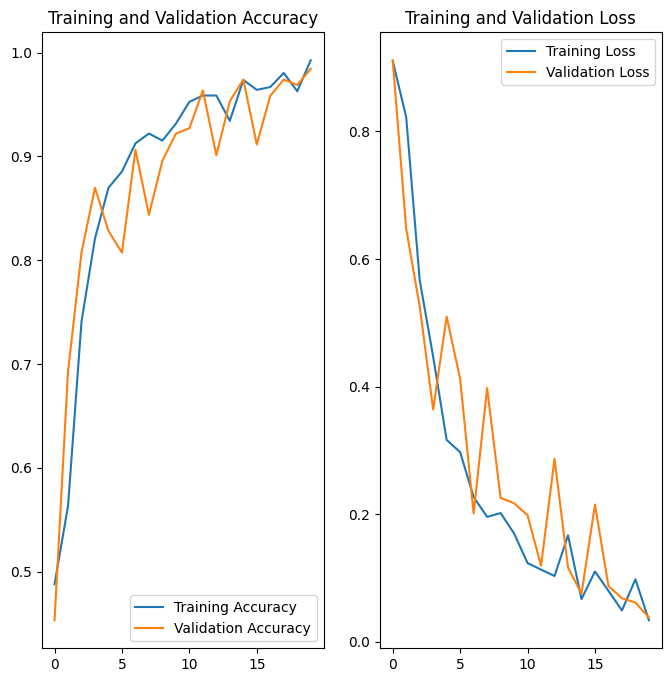

In [29]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 321ms/step
predicted label: Potato___Late_blight


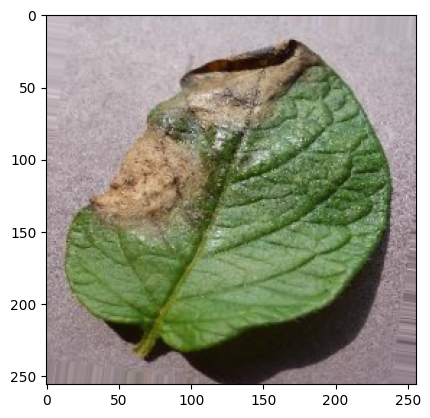

In [36]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 45ms/step


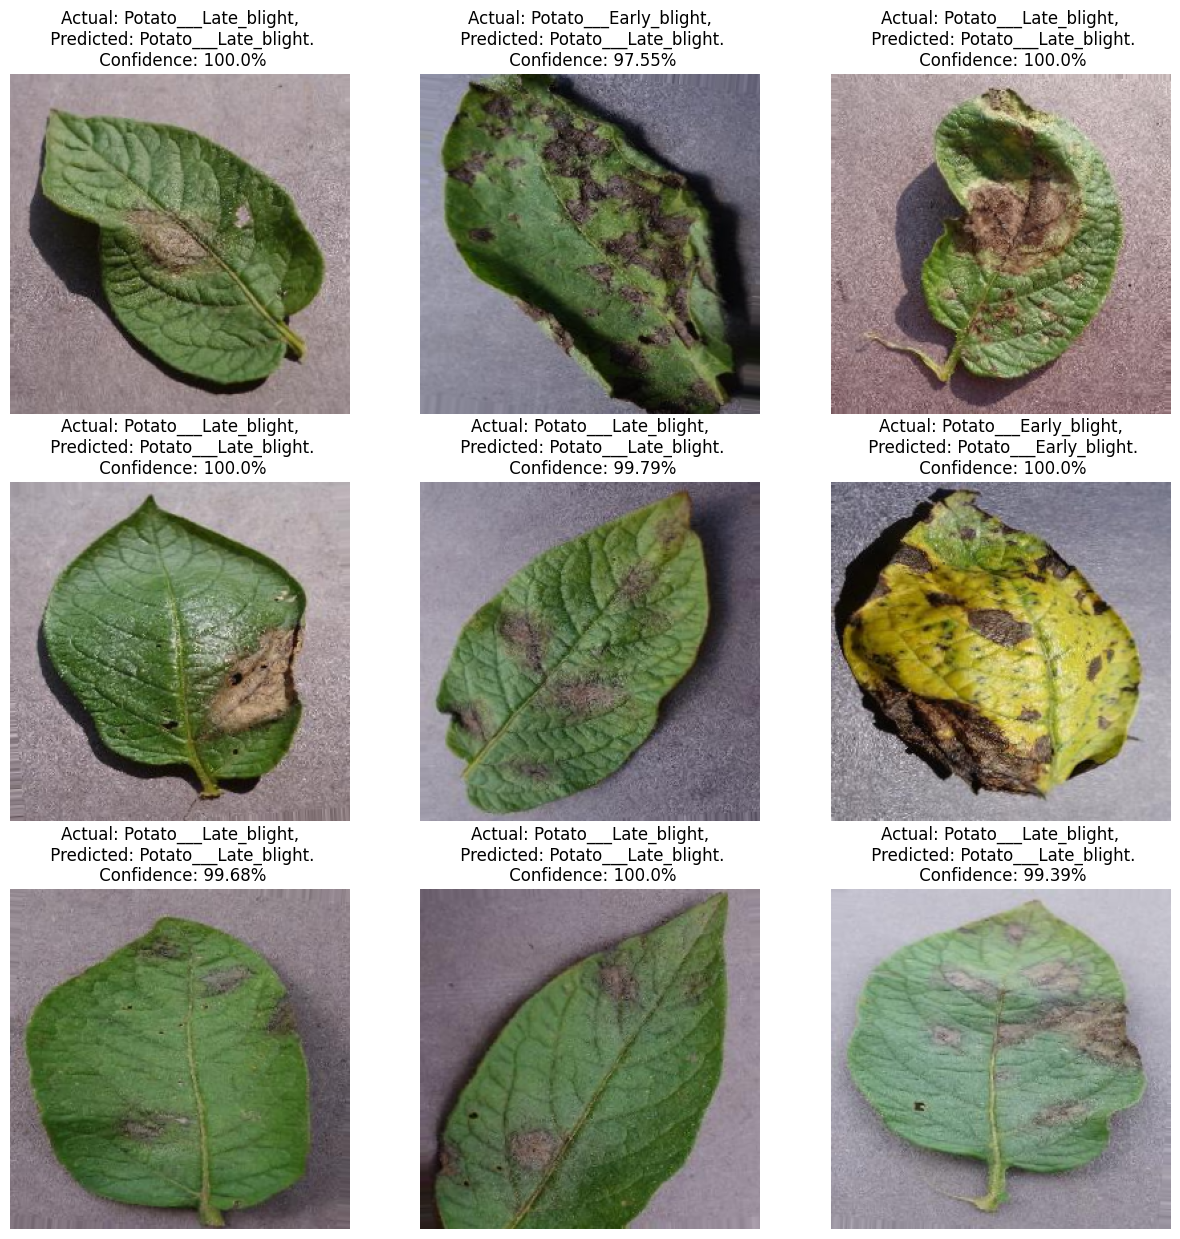

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

##### Saving the Model

In [38]:
model.save("../potatoes.h5")